Importing Important Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS #for visual representation of text data.
#Stopwords are common words which do not provide any reasonable value to our data, e.g it, the, are. we

import warnings
warnings.filterwarnings('ignore')

Mounting google drive on Colab

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
df = pd.read_csv('/content/drive/MyDrive/csv_data/Hotel_Reviews.csv') # Importing dataset from drive

In [79]:
df = df.drop(['Review_Date', 'days_since_review', 'lat', 'lng'], axis=1)

In [80]:
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: x if x != 'No Positive' else ' ')
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: x if x != 'No Negative' else ' ')
#df['review'] = df['Positive_Review']+df['Negative_Review']
df['Tags'] = df['Tags'].apply(lambda x: ' '.join(re.findall('[A-z]+', x))[1:-1] if len(re.findall('[A-z]+', x)) != 0 else ' ')

In [81]:
print(df[(df['Positive_Review']!=' ')].shape)
print(df[(df['Negative_Review']!=' ')].shape)

(479609, 13)
(386999, 13)


In [82]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [83]:
display(df.head()) # display head of the data
print('\033[91m' + 'The dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + 'columns' + '\033[0m')

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,Leisure trip Couple Duplex Double Room Stayed...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,Leisure trip Couple Duplex Double Room Stayed...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,Leisure trip Family with young children Duple...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,Leisure trip Solo traveler Duplex Double Room...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,Leisure trip Couple Suite Stayed nights Submi...


The dataset has 515738 rows and 13columns


# **Data Visualisation**

In [84]:
# Visualisation of reviewers nationality
for col in df.columns.values: # For each column

    unique_values = pd.unique(df[col].astype(str)) # Create a list of unique values
    text = '\n \033[33m' + col + '\033[0m is of data type \033[32m' + str(df[col].dtypes) + '\033[0m , has \033[91m' + str(len(unique_values)) + '\033[0m unique values, and \033[91m' + str(df[col].isnull().sum()) + '\033[0m null values'
    print(text)

    if len(unique_values) < 40: # If the column have less than 10 unique then print them
        print(unique_values)


 Hotel_Address is of data type object , has 1493 unique values, and 0 null values

 Additional_Number_of_Scoring is of data type int64 , has 480 unique values, and 0 null values

 Average_Score is of data type float64 , has 34 unique values, and 0 null values
['7.7' '8.5' '9.2' '8.4' '7.2' '8.0' '8.9' '8.2' '7.4' '9.5' '8.1' '8.7'
 '8.6' '8.3' '9.6' '9.4' '9.3' '9.1' '7.8' '9.0' '7.1' '8.8' '7.9' '7.5'
 '7.6' '9.8' '6.8' '7.0' '7.3' '6.6' '6.7' '6.9' '6.4' '5.2']

 Hotel_Name is of data type object , has 1492 unique values, and 0 null values

 Reviewer_Nationality is of data type object , has 227 unique values, and 0 null values

 Negative_Review is of data type object , has 330010 unique values, and 0 null values

 Review_Total_Negative_Word_Counts is of data type int64 , has 402 unique values, and 0 null values

 Total_Number_of_Reviews is of data type int64 , has 1142 unique values, and 0 null values

 Positive_Review is of data type object , has 412600 unique values, and 0 null va

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Hotel_Name                                  515738 non-null  object 
 4   Reviewer_Nationality                        515738 non-null  object 
 5   Negative_Review                             515738 non-null  object 
 6   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews                     515738 non-null  int64  
 8   Positive_Review                             515738 non-null  object 
 9   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 

**Observation:**
1. Only longitude and latitude has nan values


In [86]:
df['Hotel_Address'].nunique()

1493

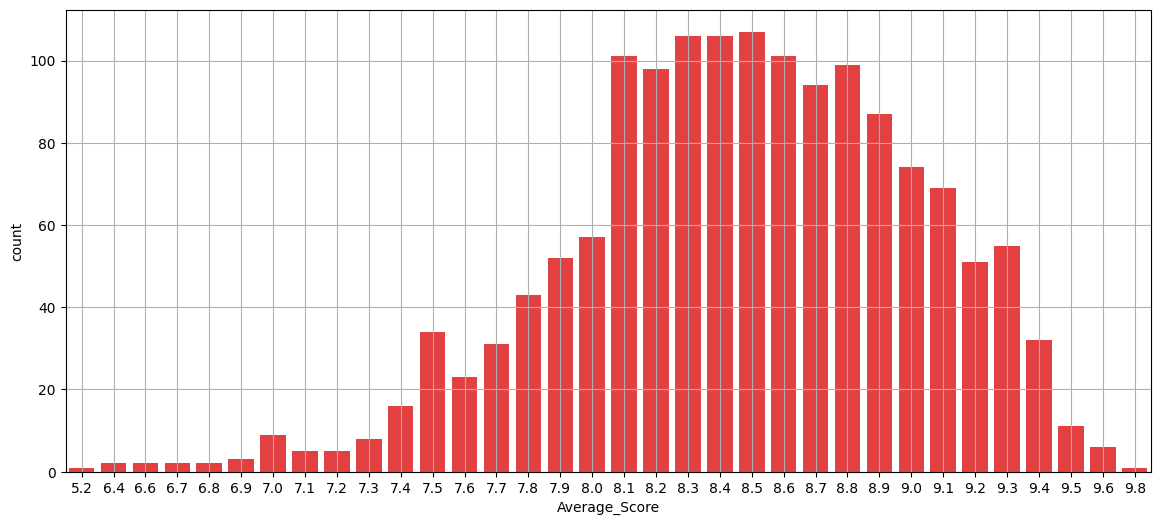

In [87]:
# Plotting the Average scores of the hotels
df1 = df[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = df1,color = 'red', alpha=0.85)
plt.grid()
plt.show()

In [88]:
df1 = df.drop_duplicates(subset='Hotel_Name', keep = 'last')

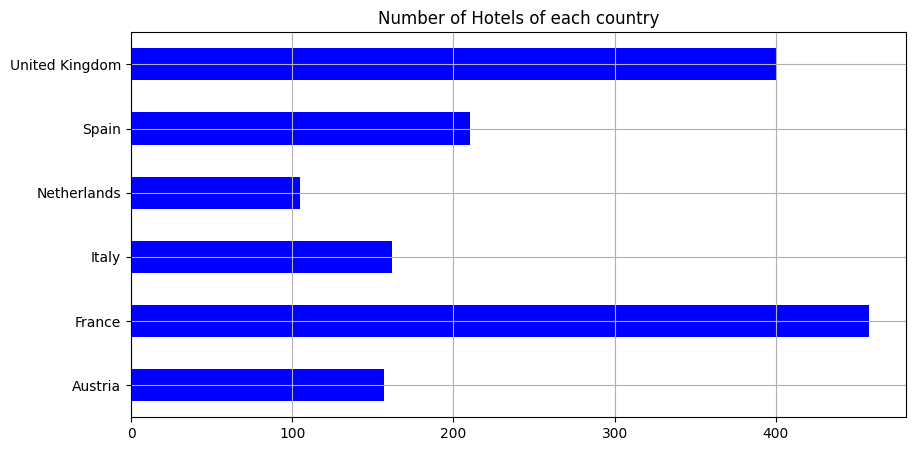

In [89]:
df1['hotel_country'] = df1.Hotel_Address.apply(lambda x: x.split(' ')[-1] if x.split(' ')[-1] != 'Kingdom' else x.split(' ')[-2] + ' ' + x.split(' ')[-1])
df1['hotel_country'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(10,5), color='blue')
plt.title('Number of Hotels of each country')
plt.grid()
plt.show()

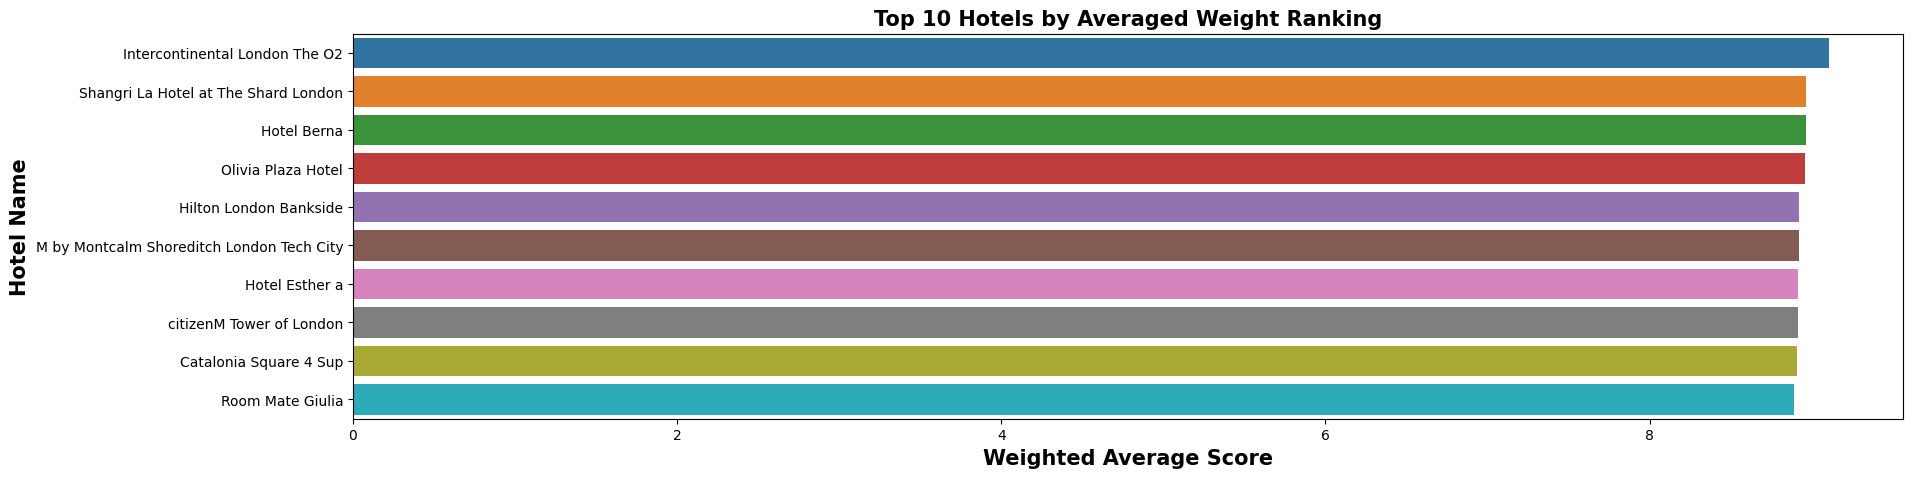

In [90]:
#df1 = df[['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates()
v = df1['Total_Number_of_Reviews']
R = df1['Average_Score']
C = df1['Average_Score'].mean()
m = df1['Total_Number_of_Reviews'].quantile(0.80)

df1['weighted_average'] = ((R*v)+(C*m))/(v+m)

df1_sorted_by_ranking = df1.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x=df1_sorted_by_ranking['weighted_average'].head(10), y=df1_sorted_by_ranking['Hotel_Name'].head(10))
plt.title('Top 10 Hotels by Averaged Weight Ranking', weight='bold', fontsize=15)
plt.xlabel('Weighted Average Score', weight='bold', fontsize=15)
plt.ylabel('Hotel Name', weight='bold', fontsize=15)
plt.show()

In [91]:
import nltk # Natural language processing toolkit
from nltk import FreqDist # Frequency distribution

import re # for regular expressions
import spacy # library for advanced Natural Language Processing

In [92]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
# function to plot most frequent terms
def freq_words(x, y, terms = 30):
    all_words_positive = ' '.join([text for text in x])
    all_words_positive = all_words_positive.split()

    fdist_positive = FreqDist(all_words_positive)
    words_df_positive = pd.DataFrame({'word':list(fdist_positive.keys()), 'count':list(fdist_positive.values())})

    all_words_negative = ' '.join([text for text in y])
    all_words_negative = all_words_negative.split()

    fdist_negative = FreqDist(all_words_negative)
    words_df_negative = pd.DataFrame({'word':list(fdist_negative.keys()), 'count':list(fdist_negative.values())})

    # selecting top 30 most frequent words
    d_positive = words_df_positive.nlargest(columns="count", n = terms)
    plt.figure(figsize=(24,5))
    ax = sns.barplot(data=d_positive, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    ax.set(xlabel = 'Words')
    plt.title('Most Common Words in positive reviews', weight='bold', fontsize=12)
    plt.show()

    # selecting top 30 most frequent words
    d_negative = words_df_negative.nlargest(columns="count", n = terms)
    plt.figure(figsize=(24,5))
    ax = sns.barplot(data=d_negative, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    ax.set(xlabel = 'Words')
    plt.title('Most Common Words in Negative reviews', weight='bold', fontsize=12)
    plt.show()

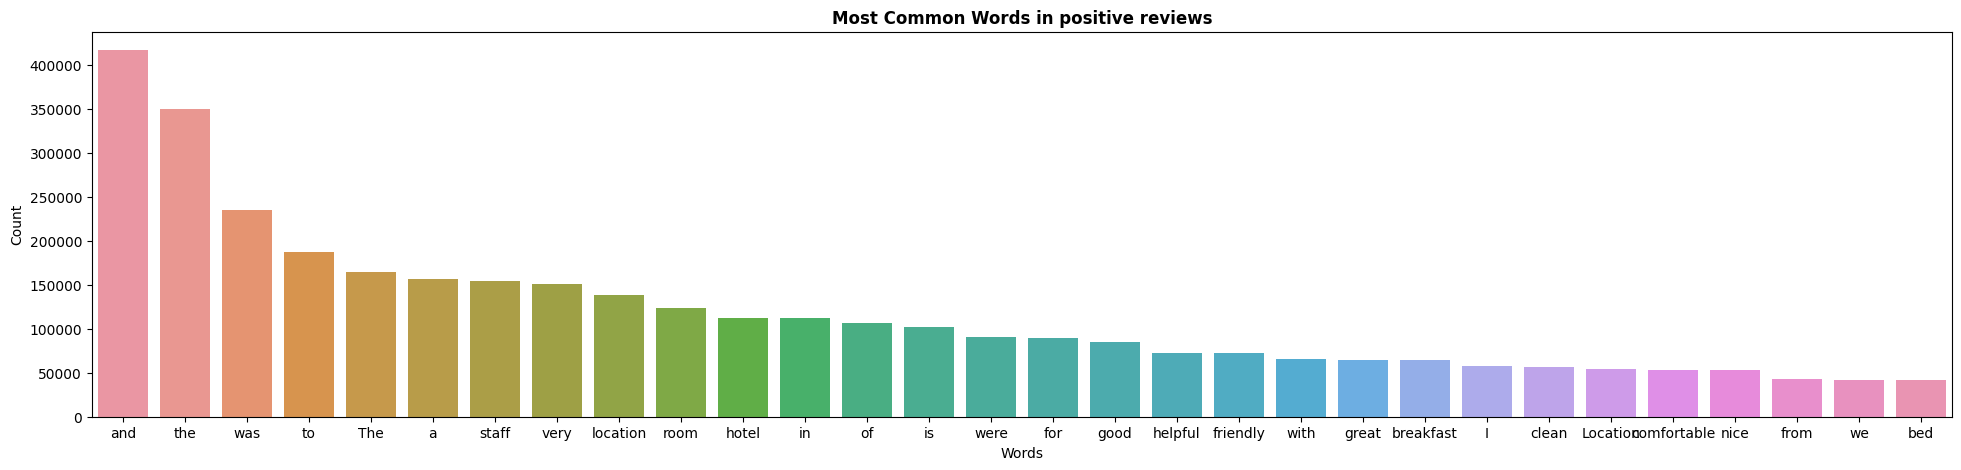

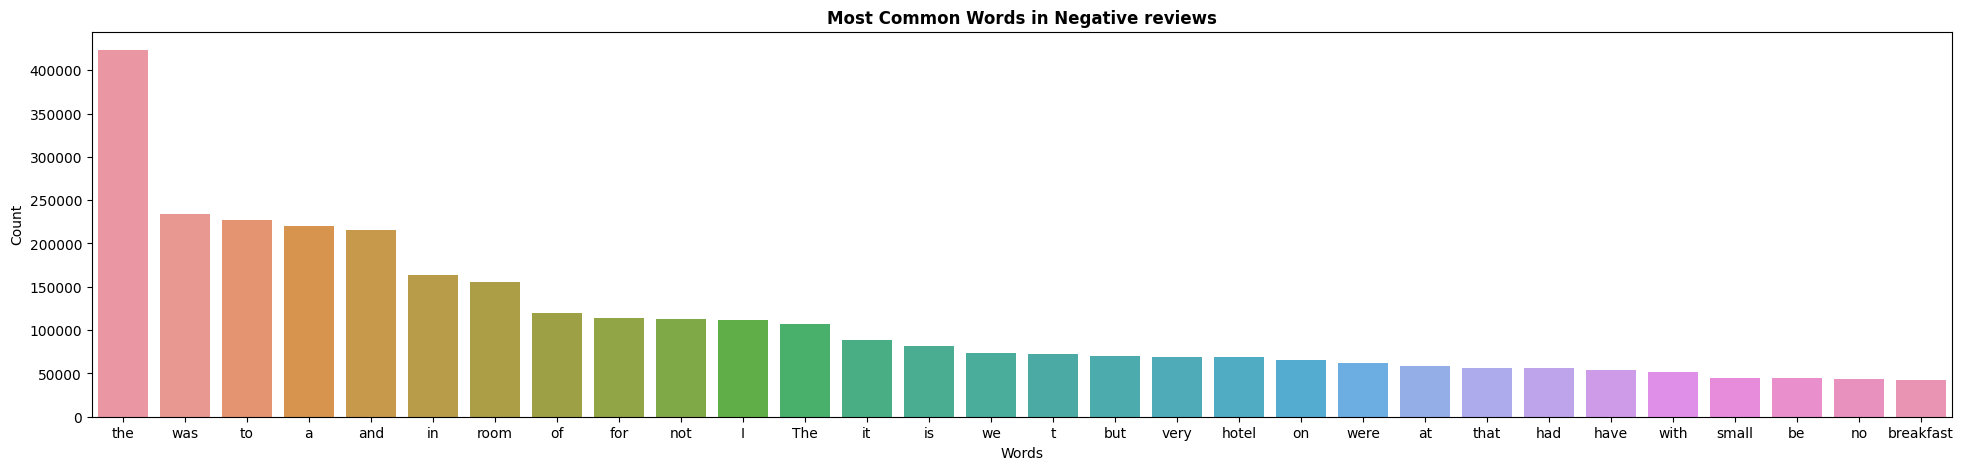

In [94]:
freq_words(df['Positive_Review'], df['Negative_Review']) # Frequency distribution of common words

**Observatios**
1. there are lot of word like 'the', 'was', 'to' e.t.c which won't help so we would remove them

In [95]:
# First of all, we remove unwanted characters, numbers and symbols
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

In [96]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
# I would apply everyting below to both positive and negative reviews
# remove short words (length < 3)
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w.lower() for w in x.split() if len(w)>2]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w.lower() for w in x.split() if len(w)>2]))

# remove stopwords from the text
Positive_Reviews = [remove_stopwords(r.split()) for r in df['Positive_Review']]
Negative_Reviews = [remove_stopwords(r.split()) for r in df['Negative_Review']]

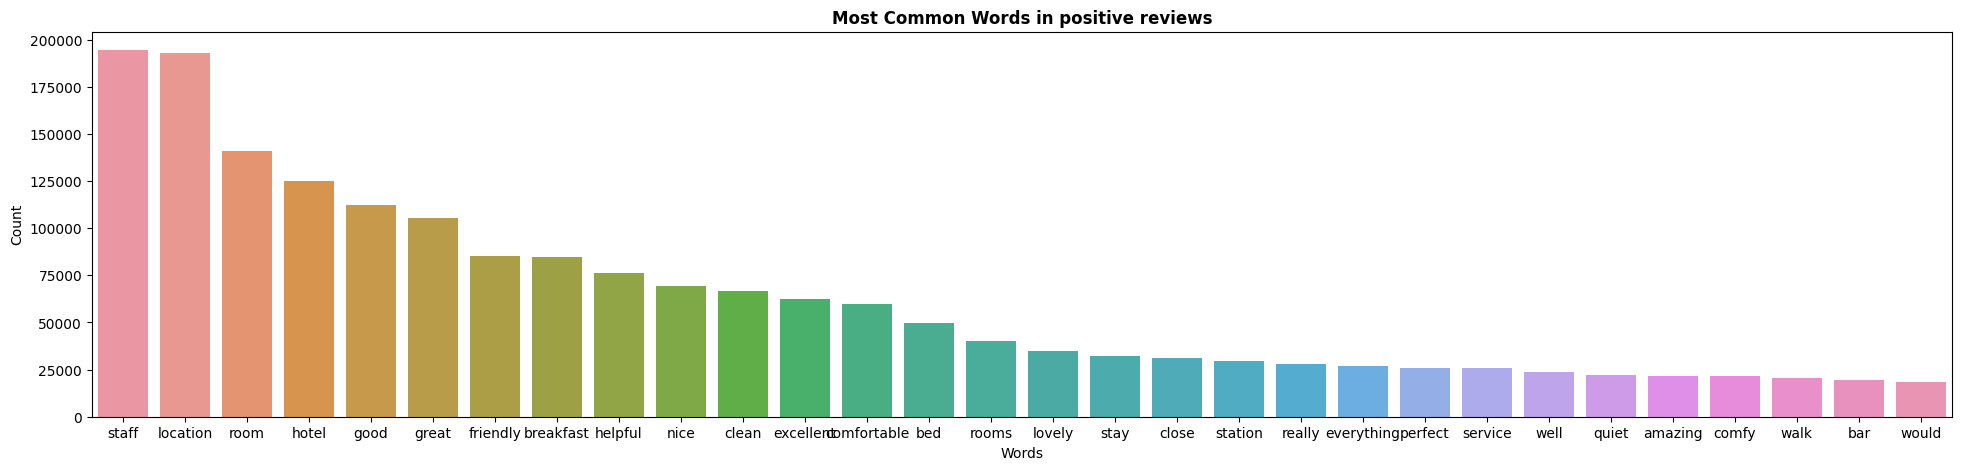

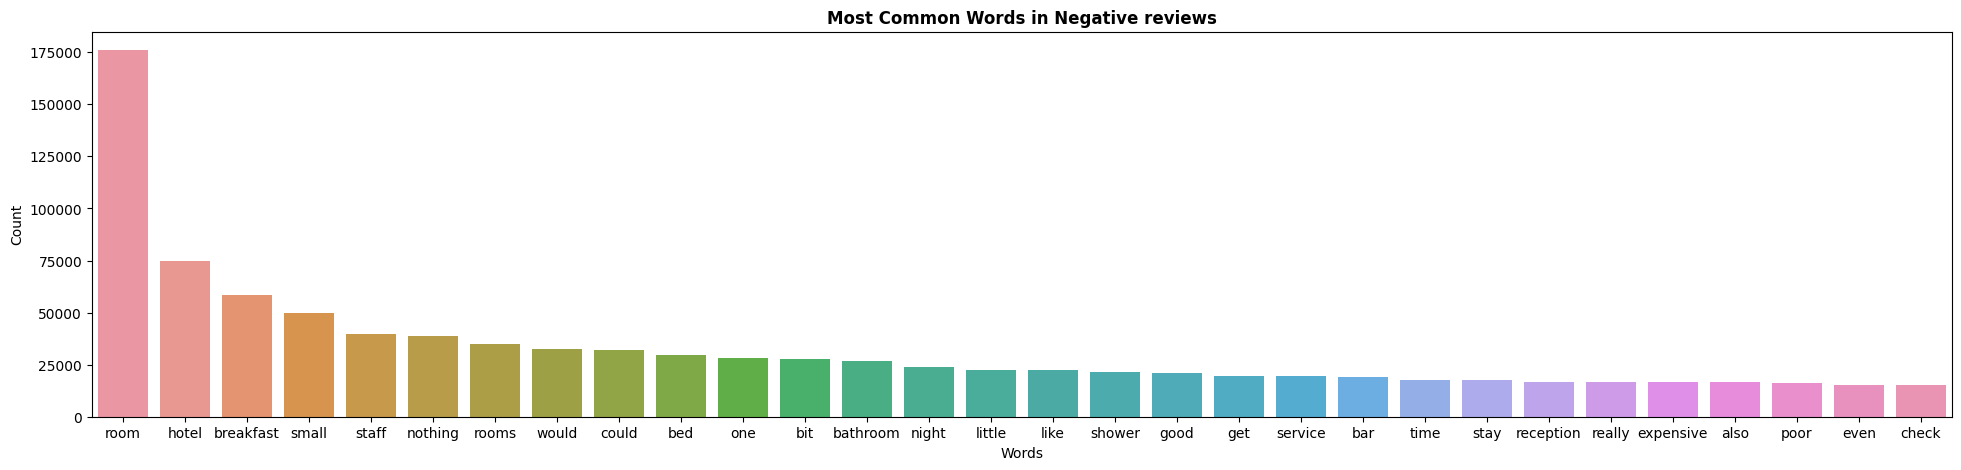

In [97]:
freq_words(Positive_Reviews, Negative_Reviews) # Frequency distribution of common words

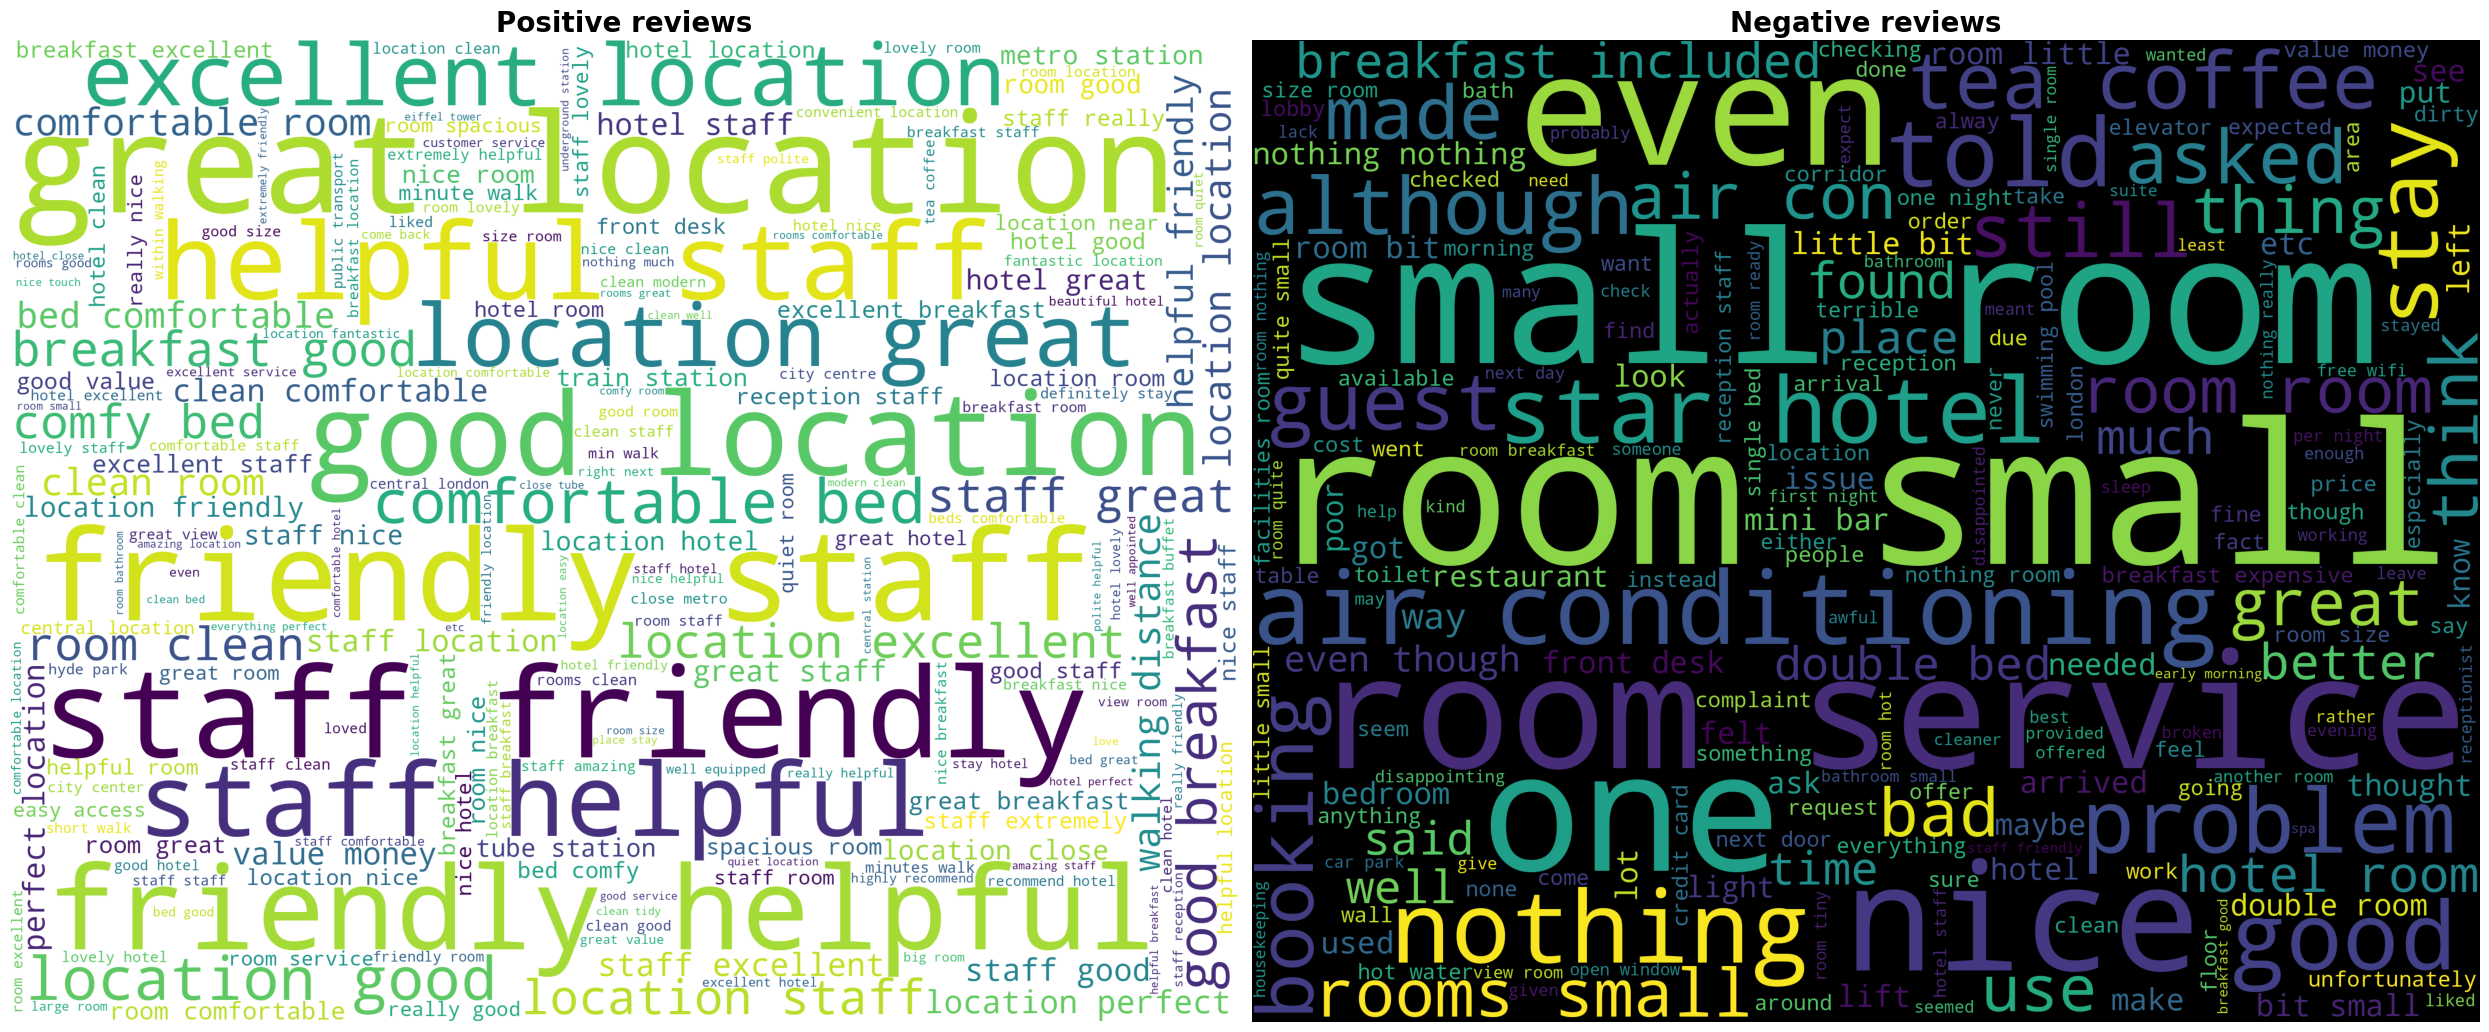

In [98]:
# Using wordcloud to visually represent the text data
def wordcloud_draw(data1, data2, color1 = 'white', color2 = 'black'):
    words1 = ' '.join(data1)
    cleaned_word1 = " ".join([word for word in words1.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color=color1,
                      width=2500,
                      height=2000
                      ).generate(cleaned_word1)


    words2 = ' '.join(data2)
    cleaned_word2 = " ".join([word for word in words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color=color2,
                      width=2500,
                      height=2000
                      ).generate(cleaned_word2)

    plt.figure(figsize=(25,15))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title('Positive reviews', weight='bold', fontsize=20)
    plt.imshow(wordcloud1)
    plt.subplot(1, 2, 2)
    plt.title('Negative reviews', weight='bold', fontsize=20)
    plt.imshow(wordcloud2)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

wordcloud_draw(Positive_Reviews, Negative_Reviews)

In [99]:
df['reviews'] = df['Positive_Review']+df['Negative_Review']

In [100]:
df['happiness'] = df['Reviewer_Score'].apply(lambda x: 'Happy' if x >= 7 else 'Unhappy')

<Axes: xlabel='happiness', ylabel='count'>

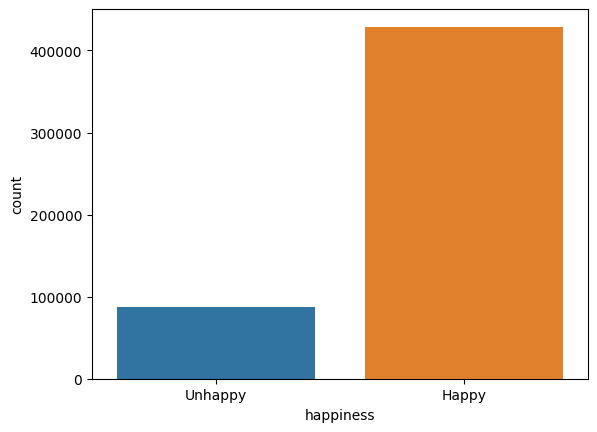

In [101]:
# Countplot
sns.countplot(x ='happiness', data = df)

In [102]:
df['happiness'] = df['happiness'].apply(lambda x: 1 if x == 'Happy' else 0)

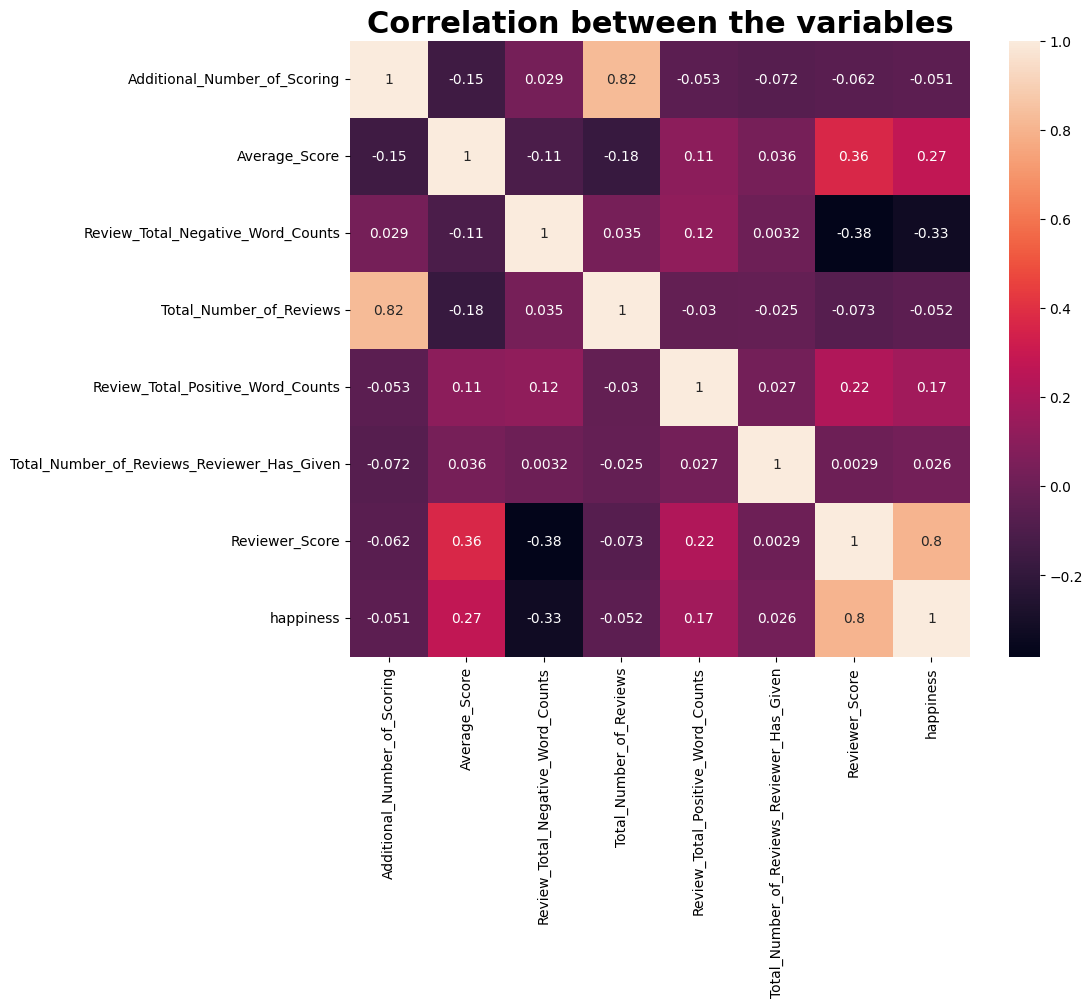

In [103]:
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot = True)
plt.title("Correlation between the variables", weight = 'bold', fontsize = 22)
plt.show()

**Observations:**
1. A Negative Correlation between reviewer score and total negative review word count shows clearly that reviewer wrote large negative reviews while giving smaller rating and vice versa. Same goes for Polarity and happiness features.
2. In case of positive review word count its correlation is positive with Reviewer score polarity and happiness which was expected.
3. High correlation between polarity and reviewer score was also expected.

In [104]:
happy_costumer_reviews = list(df[(df['happiness']==1)]['reviews'].values)
unhappy_costumer_reviews = list(df[(df['happiness']==0)]['reviews'].values)

In [105]:
# Using wordcloud to visually represent the text data
def wordcloud_draw(data1, data2, color1 = 'white', color2 = 'black'):
    words1 = ' '.join(data1)
    cleaned_word1 = " ".join([word for word in words1.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color=color1,
                      width=2500,
                      height=2000
                      ).generate(cleaned_word1)


    words2 = ' '.join(data2)
    cleaned_word2 = " ".join([word for word in words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color=color2,
                      width=2500,
                      height=2000
                      ).generate(cleaned_word2)

    plt.figure(figsize=(25,15))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title('Positive reviews', weight='bold', fontsize=20)
    plt.imshow(wordcloud1)
    plt.subplot(1, 2, 2)
    plt.title('Negative reviews', weight='bold', fontsize=20)
    plt.imshow(wordcloud2)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

#wordcloud_draw(happy_costumer_reviews, unhappy_costumer_reviews)

In [106]:
sample_df = df.sample(frac = 0.2, replace = False, random_state=42)

In [107]:
sample_df.happiness.value_counts()

1    85651
0    17497
Name: happiness, dtype: int64

In [108]:
df_happy = sample_df[sample_df['happiness']==1]
df_unhappy = sample_df[sample_df['happiness']==0]

In [109]:
df_train_test = pd.concat([df_happy.sample((df_unhappy.shape[0])*2), df_unhappy], axis=0)

In [110]:
X_train = df_train_test['reviews']
y_train = df_train_test['happiness']

In [111]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer## implement BAG OF WORDS
stopset = set(stopwords.words('english'))
#from sklearn.feature_extraction.text import CountVectorizer
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, strip_accents='ascii', stop_words="english")
#countvector=vectorizer()
traindataset=vectorizer.fit_transform(X_train)

In [73]:
# implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [74]:
testdataset=vectorizer.transform(df['reviews'])

              precision    recall  f1-score   support

           0       0.70      0.60      0.65     86851
           1       0.92      0.95      0.93    428887

    accuracy                           0.89    515738
   macro avg       0.81      0.77      0.79    515738
weighted avg       0.88      0.89      0.89    515738



Text(20.72222222222222, 0.5, 'Truth')

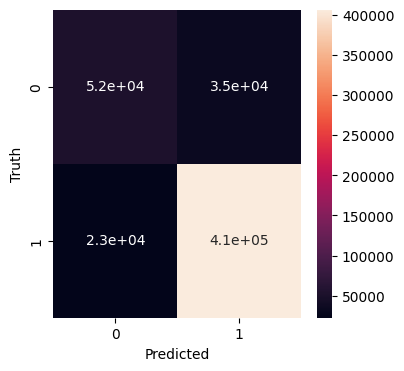

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
y_predicted = randomclassifier.predict(testdataset)
print(classification_report(df['happiness'], y_predicted))

cm = confusion_matrix(df['happiness'], y_predicted)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')